# Summary fo Results for ZnO

### Atomic positions

### MT Radii
(Zn, O) = (1.90, 1.55) Bohr, which maintains the optimal ratio for ensuring consistent precision in the total energy.
One notes that the MT radii used in the [2016 paper](10.1103/PhysRevB.94.035118) on ZnO are (1.6, 1.6)

### Basis Functions
l max goes to 5 for both species, for ground state. This will be explored further during the GW calculations.
LO recommendations are used for l=0 and 1, with the search false. These were generated some undocumented rgkmax and k-point settings.
LO trial energies for l=2 is 0 Ha and l>2 is 1 Ha, with search false.

**LO Recommendations**
In principle, the trial energies for the LOs should be changed each time the density changes. This can be due to a change in rgkmax, MT radii or k-sampling.
However, the choice of trial energy for LO energies >= 0 Ha has a negligible effect on the total energy and the est. fundamental gap of a ground state calculation.

The choice of trial energies for LOs with energies < 0 Ha is likely to have an effect on ground state calculations, however I *think* it's fine to fix them for convergence
calculations, then recompute the LO recommendations once one has settled on an rgkmax from which to do the GW calculations with.

Once one has converged rgkmax for ground state and fixed the ground state inputs, I would regenerate the LO recommendations and fix the trial energies using them for l=0,1,2,
with search = False. For l>2, one can set the trial energies to 1.0 Ha with search = False.

### LOs in Valence
The lowest-energy orbital in the valence is the 3s, with an energy of -4.73 Ha. The highest-energy orbital assigned to the core is 2p, with an energy of -36.6 Ha.

## Input Settings
See input.xml and the convergence calculations below. It is not obvious to me if the error associated with rgkmax = 8 is acceptable or not.

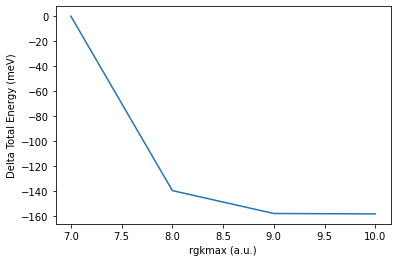

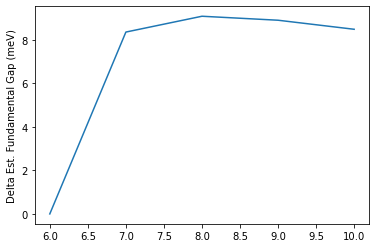

The change in total energy per atom from rgkmax = 8 to 10 is: 4.6730817506969515 meV
The change in estimated fundamental gap from rgkmax = 8 to 10 is: 0.5994671419999802 meV
The change in total energy per atom from rgkmax = 9 to 10 is: 0.08313082643435338 meV
The change in estimated fundamental gap from rgkmax = 9 to 10 is: 0.4160623060000309 meV


In [2]:
""" Convergence w.r.t rgkmax
"""
import matplotlib.pyplot as plt

from src.materials import ZnOWurzite

gmaxvr = [18, 21, 24, 27, 27]
rgkmax = [6, 7, 8, 9, 10]

total_energy = [-3739.50730056, -3739.53847191, -3739.54360625, -3739.54428096, -3739.54429318]
est_fundamental_gap = [0.02527314, 0.02558060, 0.02560734, 0.02560060, 0.02558531]

ha_to_ev = 27.2114
ha_to_mev = ha_to_ev * 1000.

plt.rcParams['axes.formatter.useoffset'] = False
plt.xlabel("rgkmax (a.u.)")
plt.ylabel("Delta Total Energy (meV)")
plt.plot(rgkmax[1:], [ (x-total_energy[1]) * ha_to_mev for x in total_energy[1:]])
plt.show()

plt.ylabel("Delta Est. Fundamental Gap (meV)")
plt.plot(rgkmax, [(x-est_fundamental_gap[0]) * ha_to_mev for x in est_fundamental_gap])
plt.show()

n_atoms = len(ZnOWurzite.elements)
delta_e = abs(total_energy[2] - total_energy[4]) * ha_to_mev / n_atoms
print(f'The change in total energy per atom from rgkmax = 8 to 10 is: {delta_e} meV')
delta_gap = abs(est_fundamental_gap[2] - est_fundamental_gap[4]) * ha_to_mev
print(f'The change in estimated fundamental gap from rgkmax = 8 to 10 is: {delta_gap} meV')

delta_e = abs(total_energy[3] - total_energy[4]) * ha_to_mev / n_atoms
print(f'The change in total energy per atom from rgkmax = 9 to 10 is: {delta_e} meV')
delta_gap = abs(est_fundamental_gap[3] - est_fundamental_gap[4]) * ha_to_mev
print(f'The change in estimated fundamental gap from rgkmax = 9 to 10 is: {delta_gap} meV')

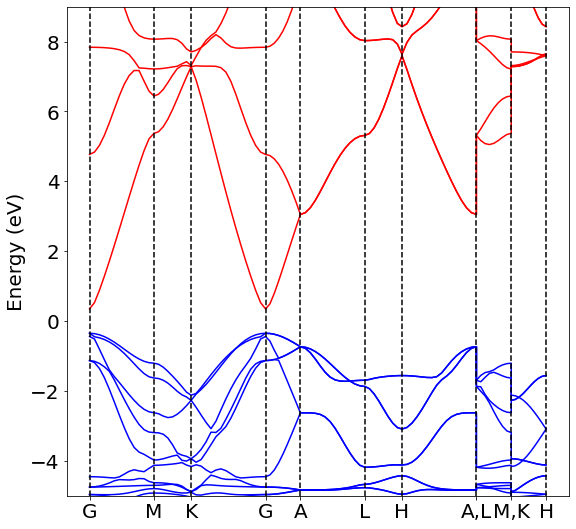

In [2]:
""" Band structure

LO trial energies for l=0 and 1 fixed at some LO recommendations (from unknown rgkmax)
LO trial energies for l=2 set to 0.01 Ha, and l>2 set yo 1.00 Ha (search true)
rgkmax="8.0", ngridk="8 8 5", gmaxvr="24.0"
"""
import matplotlib.pyplot as plt

from excitingtools.exciting_obj_parsers import parse_band_structure_to_arrays
from excitingtools.dataclasses.band_structure import BandData
from src.parsers import get_number_of_valence_bands

band_data: BandData = parse_band_structure_to_arrays('bandstructure.xml')

ha_to_ev = 27.2114
fig, ax = plt.subplots(figsize=(9, 9))

# x range and labels
vertices,labels = band_data.band_path()
ax.set_xticks(vertices)
ax.set_xticklabels(labels)

# Font sizes
ax.yaxis.label.set_size(20)
ax.tick_params(axis='both', which='major', labelsize=20)

# y range and label
plt.ylim(-5, 9)
plt.ylabel('Energy (eV)')

# Find the number of valence bands, assuming Ef = 0.0
e_fermi = 0.0
n_valence = get_number_of_valence_bands(band_data, energy_zero=e_fermi)

# Colour valence and conduction bands differently
line_colour = {key:'blue' for key in range(0, n_valence)}
line_colour.update({key:'red' for key in range(n_valence, band_data.n_bands)})

# Plot band structure
for ib in range(0, band_data.n_bands):
    plt.plot(band_data.k_points, ha_to_ev * band_data.bands[:, ib], color=line_colour[ib])

# Vertical lines at high symmetry points
for x in vertices:
    plt.axvline(x, linestyle='--', color='black')

save_image = False
if save_image:
      plt.savefig('ZnO_bandstructure.jpeg', dpi=300, facecolor='w', edgecolor='w',
                  orientation='portrait', transparent=True, bbox_inches=None, pad_inches=0.1)


### Choice of k-sampling for Ground State

The `settings` file species k-sampling of (8, 8, 5), which assumes the z-direction is the longest
Based on the shifted cell, given in `geometry.xml`, our lattice vectors are consistent with this, therefore out choice of sampling is correct.